<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/FeatureEngineering/Transformations/FunctionTransormers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("titanic.csv", usecols=["Age", "Fare", "Survived"])

In [3]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:, 1:3]
y = df.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


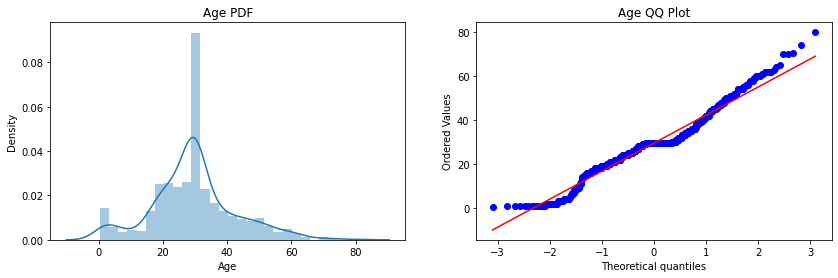

In [9]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
sns.distplot(X_train.Age)
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train.Age, dist="norm", plot=plt)
plt.title("Age QQ Plot")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


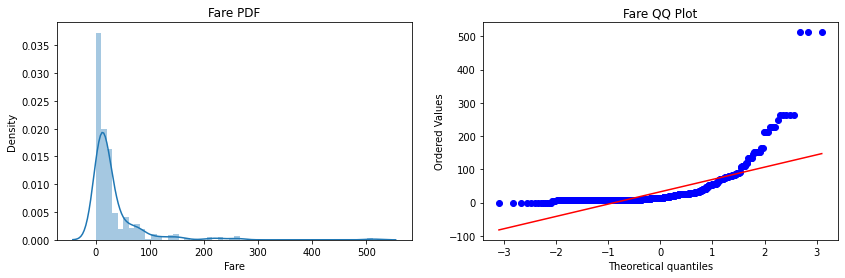

In [10]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
sns.distplot(X_train.Fare)
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train.Fare, dist="norm", plot=plt)
plt.title("Fare QQ Plot")

plt.show()

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [13]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LogReg", accuracy_score(y_test, y_pred))
print("Accuracy DecTreeClf", accuracy_score(y_test, y_pred2))

Accuracy LogReg 0.6480446927374302
Accuracy DecTreeClf 0.6759776536312849


In [15]:
trf = FunctionTransformer(func = np.log1p) # np.log vs np.log1p

# np.log apply log simply, but can break if there is 0 present, since we can't calculate log(0)
# np.log1p adds 1 to the term first, then takes log. Now even 0 will be converted to 1 and it won't break.


In [16]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [23]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [22]:
X_train_transformed.head()

,Age,Fare
331,3.839452,3.384390
733,3.178054,2.639057
382,3.496508,2.188856
704,3.295837,2.180892
813,1.945910,3.474293


In [19]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Accuracy LogReg for Transformed data ", accuracy_score(y_pred, y_test))
print("Accuracy DecTreeclf for Transformed data ", accuracy_score(y_pred2, y_test))

Accuracy LogReg for Transformed data  0.6815642458100558
Accuracy DecTreeclf for Transformed data  0.6759776536312849


In [26]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring="accuracy", cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring="accuracy", cv=10)))

LR 0.678027465667915
DT 0.655505617977528


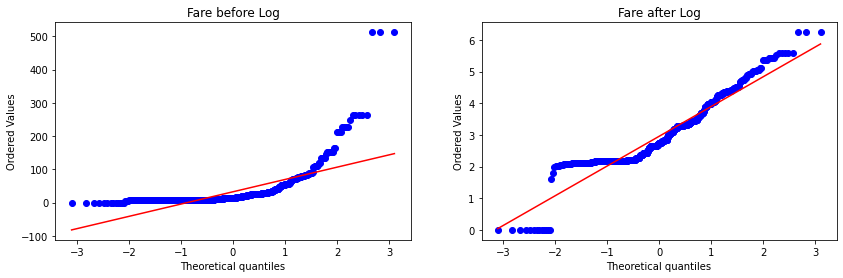

In [27]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
stats.probplot(X_train.Fare, dist="norm", plot=plt)
plt.title("Fare before Log")

plt.subplot(122)
stats.probplot(X_train_transformed.Fare, dist="norm", plot=plt)
plt.title("Fare after Log")

plt.show()

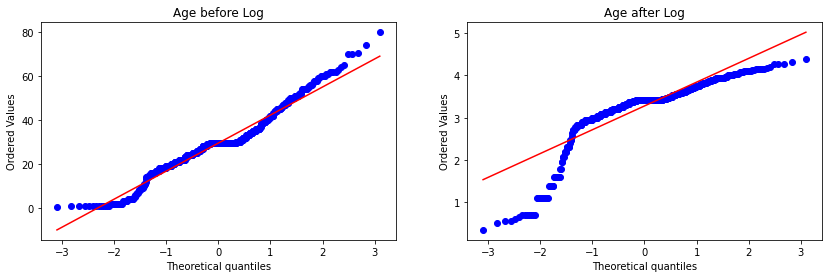

In [28]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
stats.probplot(X_train.Age, dist="norm", plot=plt)
plt.title("Age before Log")

plt.subplot(122)
stats.probplot(X_train_transformed.Age, dist="norm", plot=plt)
plt.title("Age after Log")

plt.show()

### We can see that fare improved after log transformation whereas age got messed up. So let's apply log transform on fare only.

In [29]:
trf2 = ColumnTransformer(
    [
     ("log", FunctionTransformer(np.log1p), ["Fare"])
    ],
    remainder="passthrough"
)

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)

In [33]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR", accuracy_score(y_pred, y_test))
print("Accuracy DT", accuracy_score(y_pred2, y_test))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [35]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed2, y, scoring="accuracy", cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed2, y, scoring="accuracy", cv=10)))

LR 0.6712609238451936
DT 0.6610736579275904


# Other Transforms now

In [42]:
def apply_transform(transform):
  X = df.iloc[:,1:3]
  y = df.iloc[:,0]

  trf = ColumnTransformer([("log", FunctionTransformer(transform), ["Fare"])], remainder="passthrough")

  X_trans = trf.fit_transform(X)

  clf = LogisticRegression()

  print("Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring="accuracy", cv=10)))

  plt.figure(figsize=(14, 4))

  plt.subplot(121)
  stats.probplot(X.Fare, dist="norm", plot=plt)
  plt.title("Fare Before Transform")

  plt.subplot(122)
  stats.probplot(X_trans[:,0], dist="norm", plot=plt)
  plt.title("Fare After Transform")
  
  plt.show()

Accuracy 0.6589013732833957


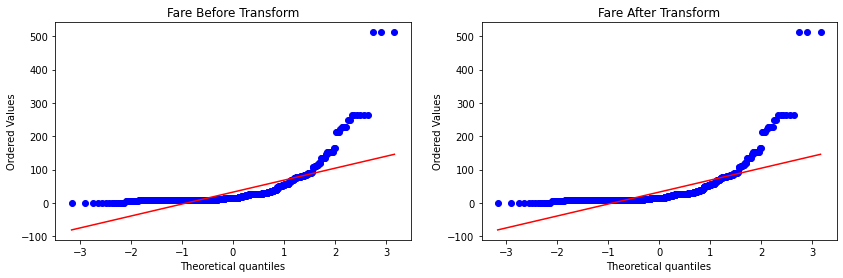

In [43]:
apply_transform(lambda x: x) # no transformation

Accuracy 0.6442446941323345


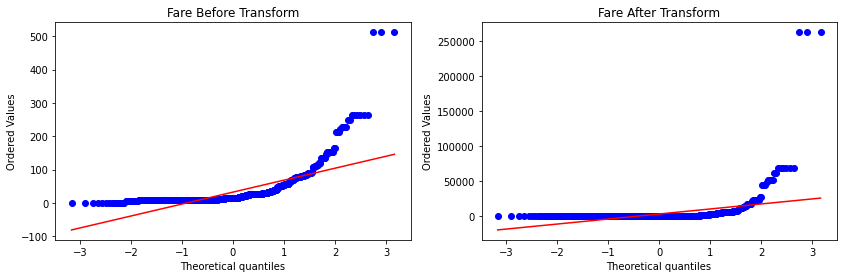

In [44]:
apply_transform(lambda x: x**2)

Accuracy 0.39843945068664166


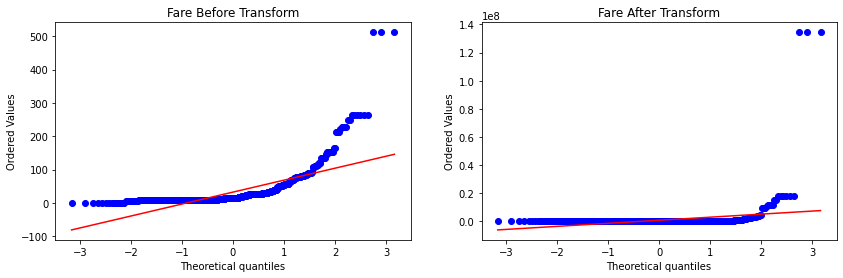

In [45]:
apply_transform(lambda x: x**3)

Accuracy 0.6589013732833957


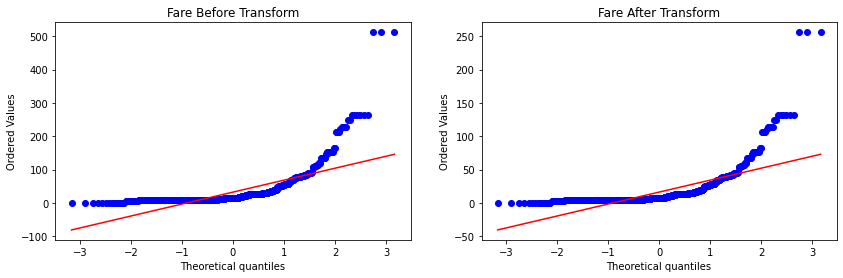

In [46]:
apply_transform(lambda x: x**1/2)

Accuracy 0.61729088639201


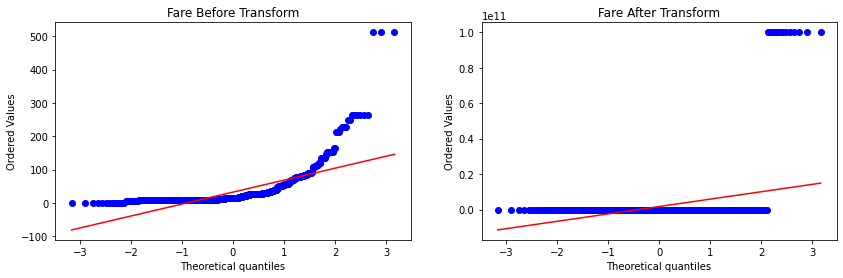

In [49]:
apply_transform(lambda x: 1/(x+0.00000000001)) # reciprocal. We added 0.0000000001 to x in denominator to handle the case where x=0

Accuracy 0.6195131086142323


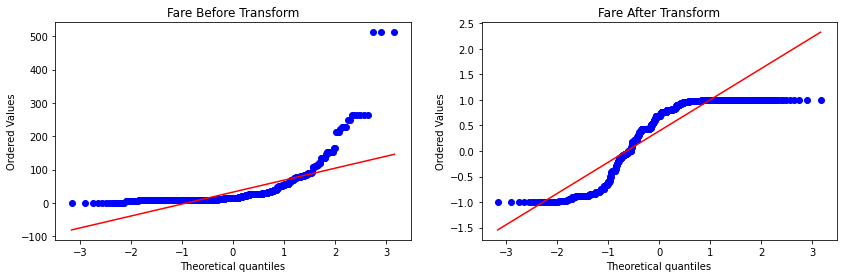

In [51]:
apply_transform(np.sin)